Train and/or predict if an image represents a road intersection or not. <br>
* Completed:
 * Basic pipeline
 * Initial/Sample training/testing <br>
* To-Do:
 * Add Call backs to save checkpoints at periodic intervals
 * Train & test with different or actual data
 * Update/Change Network

In [1]:
try:
    import tensorflow as tf
    import keras as k
    import numpy as np
    import pandas as pd
    import cv2
    import os
    import numpy as np
    from keras import Sequential
    from keras.layers import Dense, Conv2D, Flatten
    from matplotlib import pyplot as plt
    %matplotlib inline
except Exception as e:
    print("Module Missing/Misspelled: ",e)

Using TensorFlow backend.


In [2]:
# Initial Conditions & Paths
SRC_TRAIN_PATH = "./Data/"
SRC_TEST_PATH = "./Data/"
VAL_SPLIT = 0.2
CLASS_CNT = 2
EP_CNT = 10
BATCH_SIZE = 20
MODEL_NAME = "trained_model.h5"

In [3]:
# Flags; Use 1 for Yes; 0 for No
# Save trained model
FLAG_SAVE_MODEL = 1
# Plot training Acc & Loss graphs
FLAG_PLOT = 1
# Train
FLAG_TRAIN = 1
# Test
FLAG_TEST = 1

In [4]:
def get_data(path):
    # Read image, resize to (width, height), normalize
    # Extract label information (store as int)
    # Return pre-processed data & label
    files = os.listdir(path)
    data = []
    label = []
    for file in files:
        image = cv2.imread(os.path.join(path,file))
        image = cv2.resize(image, (64, 64))
        image = image / 255.0
        label_id = int(file.split("_")[0])
        data.append(image); label.append(label_id)
    return data, label

In [5]:
def create_network():
    # Create a DNN
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(CLASS_CNT, activation='softmax'))
    
    return model

In [6]:
def create_compile_net():
    # Create and compile network
    model = create_network()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Model Summary: "); model.summary()
    return model

In [7]:
if __name__ == "__main__":
    if FLAG_TRAIN:
        # Get data for training
        train_data, train_label = get_data(SRC_TRAIN_PATH)
        # Convert train data as array
        train_data = np.asarray(train_data)
        # Generate one-hot rep. for lables 
        targets = np.array([train_label]).reshape(-1)
        train_label_oh = np.eye(CLASS_CNT)[targets]

        
        # Create & compile network
        model = create_compile_net()
        # Train Net and get history (Train Loss & Accuracy) 
        print("Initiating Training: ")
        hist = model.fit(train_data, train_label_oh, epochs=EP_CNT, batch_size=BATCH_SIZE, validation_split=VAL_SPLIT)

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1230090   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 1,231,008
Trainable params: 1,231,008
Non-trainable params: 0
_________________________________________________________________
Initiating Training: 
Train on 100 samples, validate on 25 samples
Epoch 1/10
100/100 [==============================] - 1s 7ms/step - loss: 7.0728 - acc: 0.3800 - val_loss: 5.1297 - val_acc: 0.6800
Epoch 2/10
100/100 [=============================

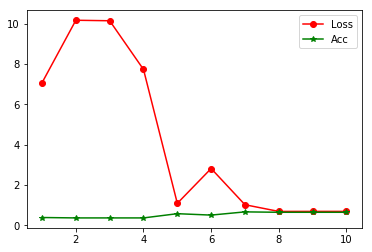

In [8]:
        if FLAG_PLOT:
            loss_list = hist.history['loss']
            acc_list = hist.history['acc']
            ep_list = range(1, EP_CNT+1)

            fig = plt.figure()
            ax = plt.subplot(111)
            ax.plot(ep_list, loss_list, label = "Loss", color="red", marker='o')
            ax.plot(ep_list, acc_list, label = "Acc", color="green", marker='*')
            ax.legend(loc = 0)
            plt.show()

In [9]:
        if FLAG_SAVE_MODEL:
            print("Saving Model file to {0}/{1}".format(os.getcwd(), MODEL_NAME))
            model.save(MODEL_NAME)
        else:
            print("Not saving model")

Saving Model file to /media/natarajan95/Bravo/Project/Project/trained_model.h5


In [10]:
    if FLAG_TEST:
        # Prediction
        try:
            from keras.models import load_model
        except Exception as e:
            print("Module Missing/Misspelled: ",e)
        
        # Get data for test
        test_data, test_label = get_data(SRC_TEST_PATH)
        # Convert test data as array
        test_data = np.asarray(test_data)
        # Generate one-hot rep. for lables
        targets = np.array([test_label]).reshape(-1)
        test_label_oh = np.eye(CLASS_CNT)[targets]
        
        # Load test Model
        pred_model = load_model(MODEL_NAME);
        # Predict
        pred_res = pred_model.predict_classes(test_data)
        # Find Accuracy
        true_res = test_label
        true = 0
        for ix, item in enumerate(pred_res):
            if pred_res[ix] == true_res[ix]:
                true = true + 1

        print("Test Accuracy: {0} % ".format(true*100/len(pred_res)))

Test Accuracy: 57.6 % 


* Anand;
* Created: Aug 26, 2018;
* Updated: Aug 31, 2018